<a href="https://colab.research.google.com/github/SALRIGO/pdm04/blob/main/py-tensorflow/DL2-CNN/dl2_06_fmnist_CNN_Daug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of fmnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료
    * **Data augmentation**

***
- ## Traget: **Find the best model**
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

## Search the best model of Fashion mnist
- callback
    - Early stopping
    - model checkpoint
- data ajumentation

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


In [13]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [14]:
from keras.datasets import fashion_mnist

(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [15]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [16]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((60000,), (60000, 10))

### Display fashion_mnist
- one random fashion
- 10 representative fashions

1973


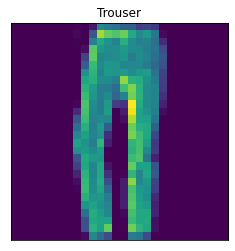

In [17]:
# Code here!
# display one random image from the training set:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

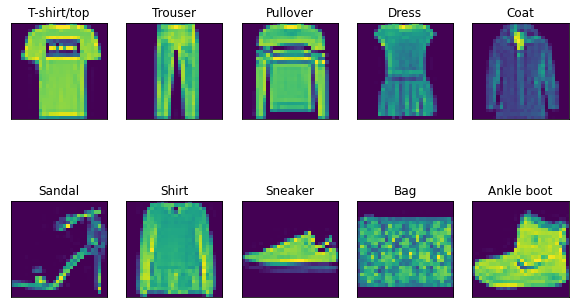

In [18]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])

## data augmentation

In [21]:
# data augmentation
# https://secantzhang.github.io/blog/deep-learning-fashion-mnist
# fmnist_c2f2_Daug_best_weights.028-0.9231.hdf5
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(X_train)

In [10]:
# # data augmentation
# # https://medium.com/@mjbhobe/classifying-fashion-with-a-keras-cnn-achieving-94-accuracy-part-3-c7ca2919232b
# datagen = ImageDataGenerator(
#     rotation_range=90,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,            # shearing image
#     zoom_range=0.2,             # zooming
#     horizontal_flip=True,       # flip along y axis
#     fill_mode='nearest'
#     )
# datagen.fit(X_train)

(9, 28, 28, 1) (9, 10)


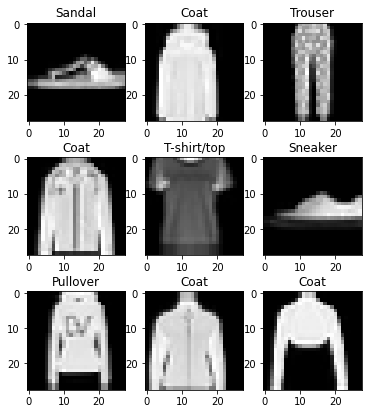

In [22]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    print(X_batch.shape, y_batch.shape)
    # create a grid of 3x3 images
    plt.figure(figsize=(6,7))
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        plt.title(class_names[np.argmax(y_batch[i])])
        # show the plot
    plt.show()
    break


In [23]:
BATCH_SIZE=50
itr = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
itr.next()[0].shape,itr.next()[1].shape

((50, 28, 28, 1), (50, 10))

In [ ]:
# itr.next()[0][0].shape

In [24]:
images = np.squeeze(itr.next()[0],3)

In [25]:
labels = np.argmax(itr.next()[1],1)
labels

array([4, 9, 0, 9, 1, 4, 4, 4, 5, 7, 4, 3, 4, 8, 2, 3, 6, 4, 7, 7, 3, 4,
       6, 2, 6, 9, 6, 2, 1, 6, 9, 8, 0, 5, 0, 6, 1, 5, 8, 4, 0, 1, 6, 7,
       2, 2, 5, 9, 0, 4])

(50, 28, 28, 1) (50, 10)


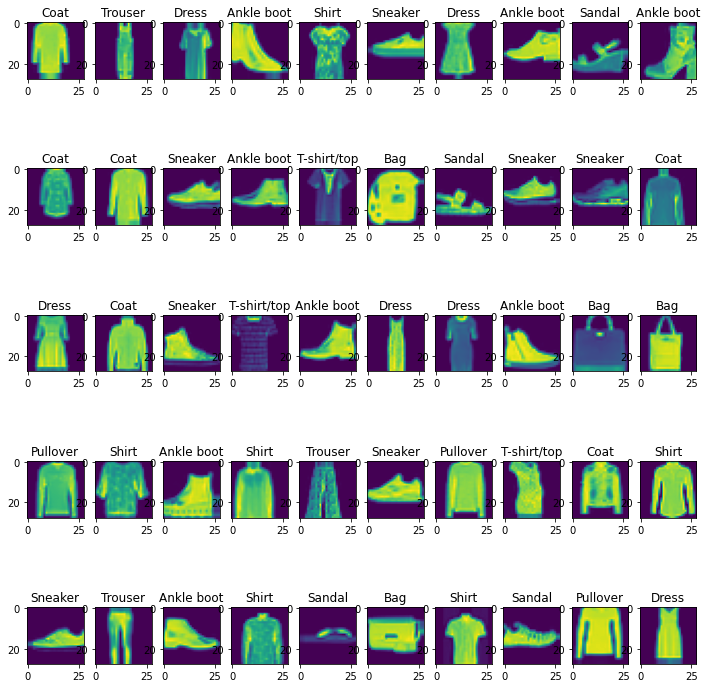

In [26]:
BATCH_SIZE = 50
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=BATCH_SIZE):
    print(X_batch.shape, y_batch.shape)
    # create a grid of 5x10 images
    plt.figure(figsize=(12,13))
    for i in range(BATCH_SIZE):
        plt.subplot(5,10,i+1)
        plt.imshow(X_batch[i].reshape(28, 28)) #, cmap=plt.get_cmap('gray'))
        plt.title(class_names[np.argmax(y_batch[i])])
        # show the plot
    plt.show()
    break


### wrong match between images and classes by iteration

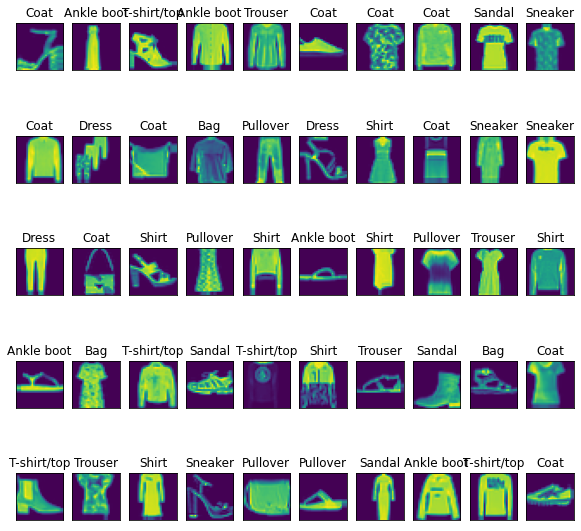

In [27]:
fig = plt.figure(figsize=(10,10))
for i in range(BATCH_SIZE):
    plt.subplot(5, 10, i+1)
    # num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(images[i]) #, cmap='gray') 
    plt.title(class_names[labels[i]])
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers

In [29]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [30]:
# 모델 구성
num_classes = 10
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dense(num_classes, activation='softmax'))

In [31]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)

In [32]:
cp_callback = callbacks.ModelCheckpoint(filepath="./fmnist_Daug_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)

In [33]:
model.compile(loss='categorical_crossentropy',
        optimizer='adam', #opt_rms,
        metrics=['accuracy'])

In [34]:
BATCH_SIZE = 100
epochs = 500
hist = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), 
                 steps_per_epoch=X_train.shape[0]//BATCH_SIZE, 
                 epochs=epochs, verbose=1, 
                 callbacks=[cp_callback, es_callback], 
                 validation_data=(X_test,y_test))

Epoch 1/500
600/600 [==============================] - 46s 59ms/step - loss: 0.7067 - accuracy: 0.7547 - val_loss: 0.4456 - val_accuracy: 0.8489
Epoch 2/500
600/600 [==============================] - 34s 57ms/step - loss: 0.4804 - accuracy: 0.8351 - val_loss: 0.4083 - val_accuracy: 0.8728
Epoch 3/500
600/600 [==============================] - 35s 58ms/step - loss: 0.4216 - accuracy: 0.8593 - val_loss: 0.3503 - val_accuracy: 0.8875
Epoch 4/500
600/600 [==============================] - 35s 58ms/step - loss: 0.3907 - accuracy: 0.8729 - val_loss: 0.3326 - val_accuracy: 0.8937
Epoch 5/500
600/600 [==============================] - 35s 58ms/step - loss: 0.3746 - accuracy: 0.8780 - val_loss: 0.3340 - val_accuracy: 0.8912
Epoch 6/500
600/600 [==============================] - 35s 58ms/step - loss: 0.3581 - accuracy: 0.8865 - val_loss: 0.3439 - val_accuracy: 0.8915
Epoch 7/500
600/600 [==============================] - 35s 58ms/step - loss: 0.3506 - accuracy: 0.8905 - val_loss: 0.3309 - val_ac

In [35]:
model.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

100/100 [==============================] - 2s 12ms/step - loss: 0.3532 - accuracy: 0.8964


[0.3531522750854492, 0.896399974822998]

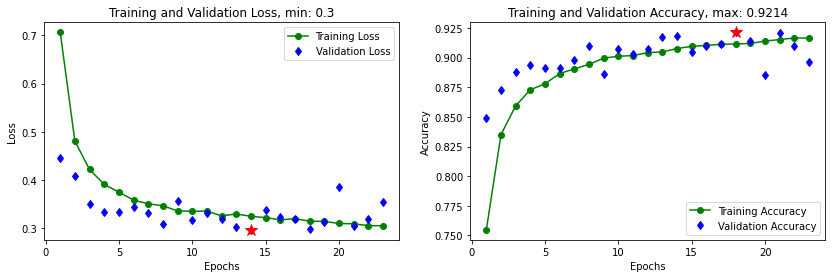

In [36]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---

## **CNN2 + FCN3**

In [37]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [39]:
from keras.layers import MaxPool2D

In [40]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),filters= 32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 64, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [41]:
c2f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [42]:
mc_callback = callbacks.ModelCheckpoint(filepath="./fmnist_c2f3_Daug_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)    # patience=5, 10, 20, 50

In [43]:
BATCH_SIZE = 100
hist = c2f3.fit(X_train, y_train, epochs=500, batch_size =BATCH_SIZE, 
         callbacks=[mc_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
600/600 [==============================] - 8s 11ms/step - loss: 0.5912 - accuracy: 0.7856 - val_loss: 0.3798 - val_accuracy: 0.8598
Epoch 2/500
600/600 [==============================] - 6s 10ms/step - loss: 0.3681 - accuracy: 0.8700 - val_loss: 0.3102 - val_accuracy: 0.8856
Epoch 3/500
600/600 [==============================] - 6s 10ms/step - loss: 0.3141 - accuracy: 0.8879 - val_loss: 0.2877 - val_accuracy: 0.8937
Epoch 4/500
600/600 [==============================] - 6s 11ms/step - loss: 0.2763 - accuracy: 0.9013 - val_loss: 0.2745 - val_accuracy: 0.8996
Epoch 5/500
600/600 [==============================] - 6s 10ms/step - loss: 0.2523 - accuracy: 0.9084 - val_loss: 0.2647 - val_accuracy: 0.9059
Epoch 6/500
600/600 [==============================] - 6s 10ms/step - loss: 0.2303 - accuracy: 0.9165 - val_loss: 0.2469 - val_accuracy: 0.9098
Epoch 7/500
600/600 [==============================] - 6s 10ms/step - loss: 0.2123 - accuracy: 0.9228 - val_loss: 0.2380 - val_accuracy:

In [44]:
c2f3.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

100/100 [==============================] - 0s 5ms/step - loss: 0.3031 - accuracy: 0.9247


[0.30308282375335693, 0.9247000217437744]

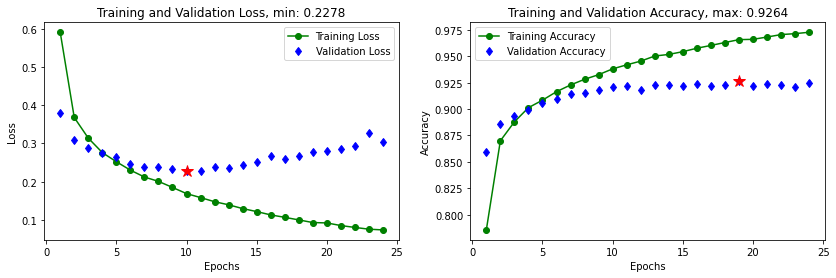

In [45]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

## Best model
- fmnist_c2f3_Daug_best_weights.019-0.9264.hdf5

In [46]:
from keras.models import load_model

model_best = load_model('fmnist_c2f3_Daug_best_weights.019-0.9264.hdf5')
model_best.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

100/100 [==============================] - 1s 5ms/step - loss: 0.2787 - accuracy: 0.9264


[0.27871647477149963, 0.9264000058174133]

---

In [47]:
from sklearn.metrics import confusion_matrix

predictions = model_best.predict(X_test)
predictions0 = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test0, predictions0)


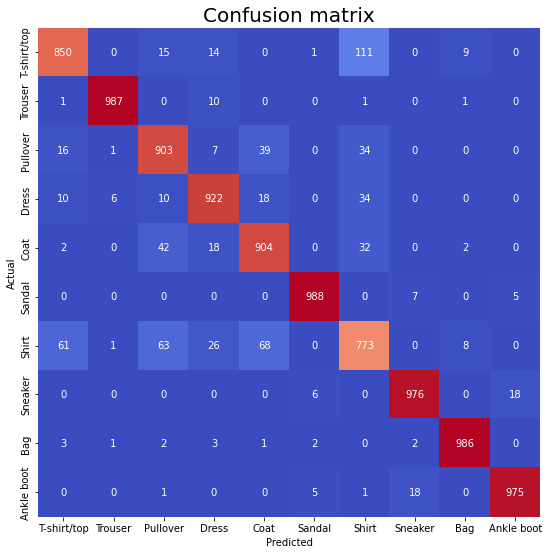

In [48]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix', fontsize=20)
plt.show()

---